### Objective:
    This notebook intend to do model building and model optimization with best parameter search for every algorithm

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression 

### Loading Data(Credit Card Fraud):
    

In [44]:
dataframe= pd.read_csv('creditcard.csv')
# Print top 5 rows
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




0    284315
1       492
Name: Class, dtype: int64


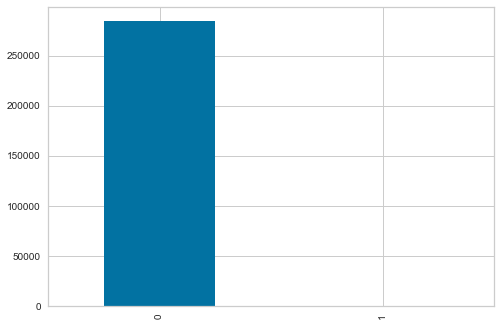

In [39]:
# Class Distribution
dataframe['Class'].value_counts().plot(kind='bar')
print('\n')
print(dataframe['Class'].value_counts())

### 
    So we have highly imbalanced dataset

### Feature importance

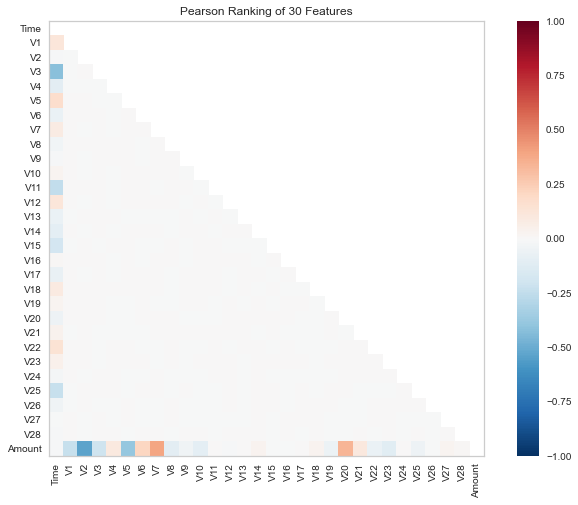

<AxesSubplot:title={'center':'Pearson Ranking of 30 Features'}>

In [46]:
# Plotting Correlation score to detect colinear relationship 
plt.figure(figsize=(12,8))
from yellowbrick.features import Rank1D, Rank2D
#label=dataframe.pop('Class')
#features= dataframe.copy()
visualizer= Rank2D(algorithm='pearson')
visualizer.fit(features, label)
visualizer.transform(features)
visualizer.show()

In [18]:
from yellowbrick.features import Rank1D
#label=dataframe.pop('Class')
#features= dataframe.copy()

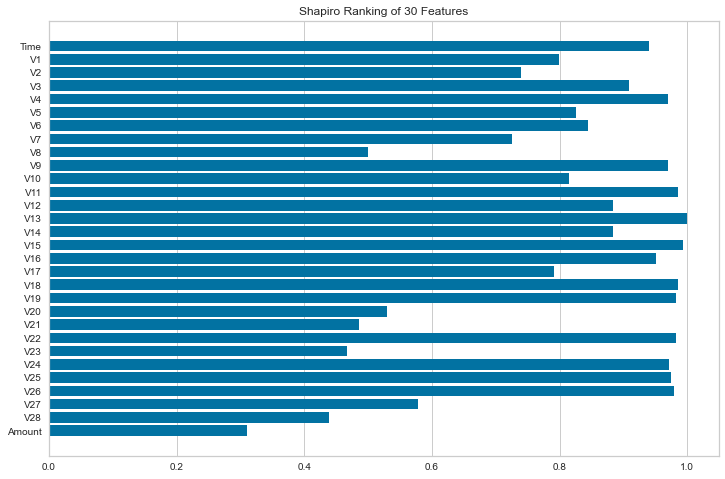

<AxesSubplot:title={'center':'Shapiro Ranking of 30 Features'}>

In [20]:
# Feature ranking plot with yellowbrick
plt.figure(figsize=(12,8))
visualizer=Rank1D(algorithm= 'shapiro')
visualizer.fit(features, label)
visualizer.transform(features)
visualizer.show()

In [7]:
dataframe.shape

(284807, 31)

<AxesSubplot:>

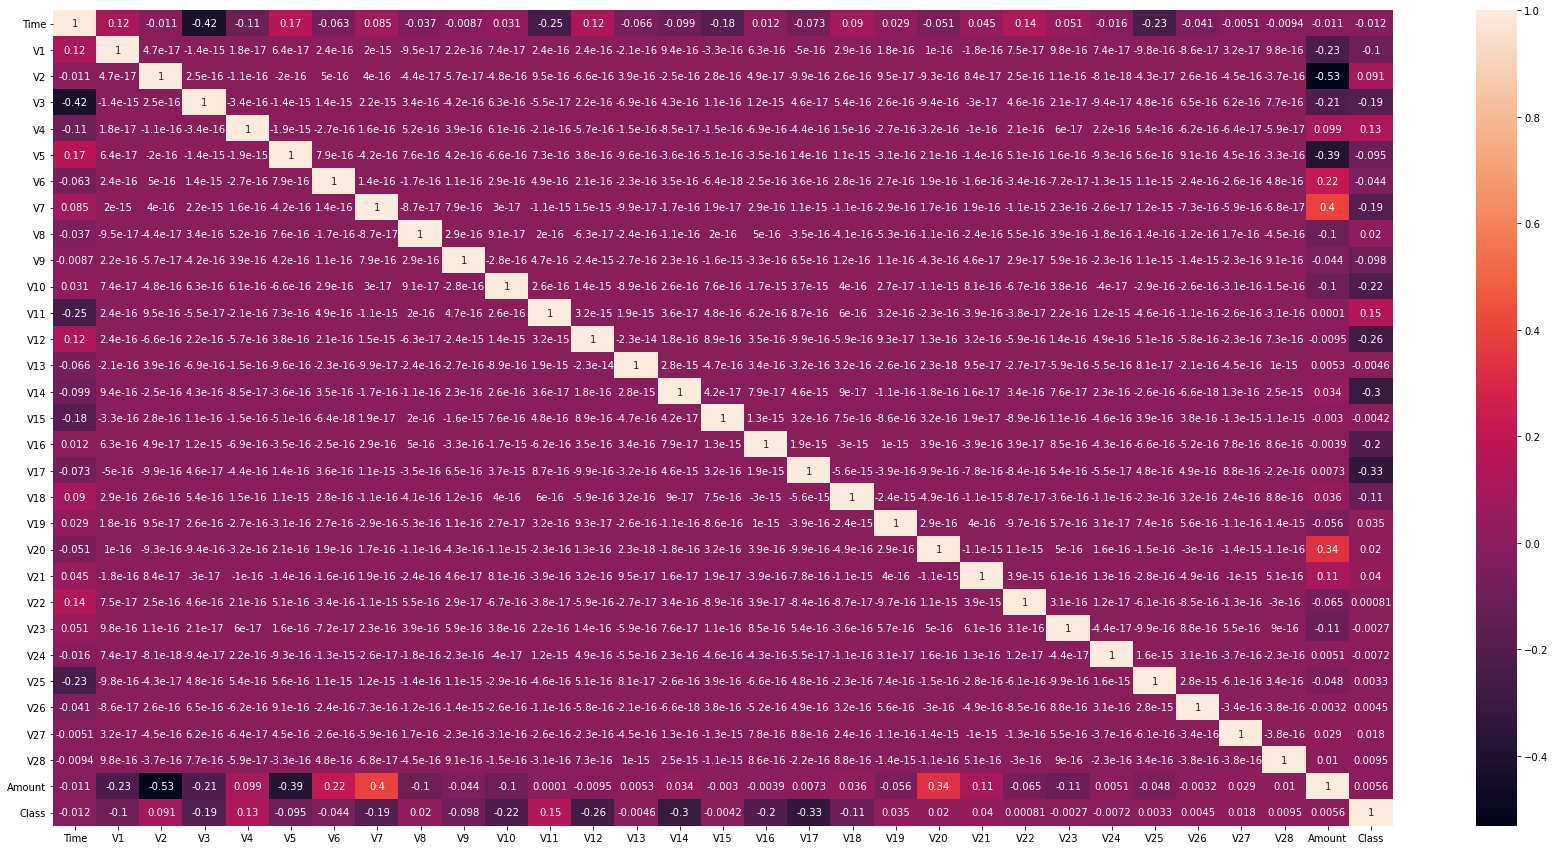

In [17]:
# Heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
sns.heatmap(dataframe.corr(), annot= True)

In [50]:
#from yellowbrick.features import Manifold
#viz= Manifold(manifold= 'tsne')
#viz.fit_transform(features, label)
#viz.show()

### Model building with RandomForestClassifier

In [51]:
from sklearn import metrics
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}

rfc= RandomForestClassifier(max_depth=2)
scoring=['precision', 'recall', 'f1_macro']
scores= cross_validate(rfc, features, label, scoring=scoring)


In [55]:
print('Precision: %.2f'% scores['test_precision'].mean())
print('Recall: %.2f'% scores['test_recall'].mean())
print('F1_score: %.2f'% scores['test_f1_macro'].mean())

Precision: 0.88
Recall: 0.56
F1_score: 0.83


### 
    I am exhausted here due to time taken by model with few parameter to fit on the data, so now i have decided here to tune the model with best parameter using pycaret.

### Model building with pycaret

In [24]:
#Loading pycaret library
from pycaret.classification import *
credit_clf= setup(data= dataframe, target='Class')

,Description,Value
0,session_id,7657
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
# Comparing the models
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9819,0.7864,0.9488,0.8556,0.8554,0.8614,58.7540
rf,Random Forest Classifier,0.9995,0.9454,0.7659,0.9358,0.8400,0.8397,0.8451,75.4690
et,Extra Trees Classifier,0.9995,0.9498,0.7687,0.9504,0.8478,0.8475,0.8534,10.9590
lda,Linear Discriminant Analysis,0.9994,0.8959,0.7658,0.8560,0.8043,0.8040,0.8073,0.9710
ada,Ada Boost Classifier,0.9992,0.9732,0.6951,0.8272,0.7503,0.7499,0.7553,23.4600
lr,Logistic Regression,0.9991,0.9454,0.6044,0.8344,0.6960,0.6955,0.7071,7.1750
dt,Decision Tree Classifier,0.9991,0.8782,0.7570,0.7288,0.7395,0.7391,0.7408,6.7150
gbc,Gradient Boosting Classifier,0.9990,0.7087,0.5187,0.8196,0.5994,0.5990,0.6283,119.0200
ridge,Ridge Classifier,0.9989,0.0000,0.4137,0.8385,0.5438,0.5433,0.5822,0.1470
knn,K Neighbors Classifier,0.9984,0.6102,0.0587,0.9250,0.1089,0.1088,0.2256,1.6100


### 
    XGBoost performance is the best among the all classifier model with highest accuracy, AUC, Recall, F1, Kappa and MCC.
    Dataset is highly imbalanced so in this case accuracy does not provide too much information about the model performance, here we will consider F1 and Kappa score and both are good.

In [27]:
# Let's see parameters of XGBClassifier
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7657, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [28]:
# Creating the Model
xgb= create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9734,0.7059,1.0000,0.8276,0.8273,0.8400
1,0.9996,0.9914,0.8824,0.8824,0.8824,0.8822,0.8822
2,0.9995,0.9647,0.7647,0.9630,0.8525,0.8522,0.8579
3,0.9993,0.9858,0.6286,1.0000,0.7719,0.7716,0.7926
4,0.9997,0.9912,0.8824,0.9677,0.9231,0.9230,0.9239
5,0.9998,0.9862,0.9118,0.9688,0.9394,0.9393,0.9397
6,0.9995,0.9635,0.7059,1.0000,0.8276,0.8273,0.8400
7,0.9994,0.9856,0.7647,0.8667,0.8125,0.8122,0.8138
8,0.9996,0.9924,0.7941,0.9643,0.8710,0.8708,0.8749
9,0.9995,0.9851,0.8235,0.8750,0.8485,0.8482,0.8486


In [29]:
# Parameters
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7657, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [30]:
# Tunning the model with best parameter
tuned_xgb= tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9863,0.7647,0.8966,0.8254,0.8251,0.8277
1,0.9995,0.9917,0.8824,0.8571,0.8696,0.8693,0.8694
2,0.9994,0.9648,0.7647,0.8966,0.8254,0.8251,0.8277
3,0.9994,0.9704,0.7429,0.9286,0.8254,0.8251,0.8303
4,0.9996,0.9799,0.9118,0.8611,0.8857,0.8855,0.8859
5,0.9997,0.9962,0.9412,0.9143,0.9275,0.9274,0.9275
6,0.9994,0.9823,0.7353,0.8929,0.8065,0.8062,0.8100
7,0.9995,0.9897,0.8235,0.8750,0.8485,0.8482,0.8486
8,0.9996,0.9951,0.8235,0.9333,0.8750,0.8748,0.8765
9,0.9995,0.9904,0.8529,0.8529,0.8529,0.8527,0.8527


In [31]:
# Now parameters are changed
tuned_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=240, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=7657, reg_alpha=0.7,
              reg_lambda=5, scale_pos_weight=47.900000000000006, subsample=0.5,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

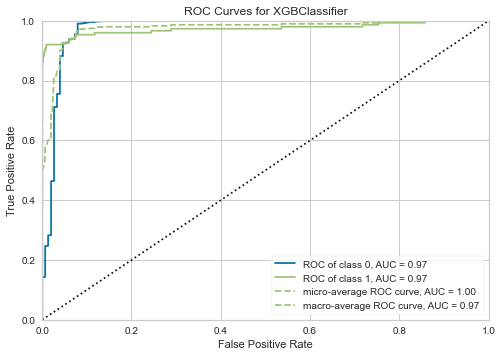

In [32]:
# ROC AUC
plot_model(tuned_xgb, plot= 'auc')

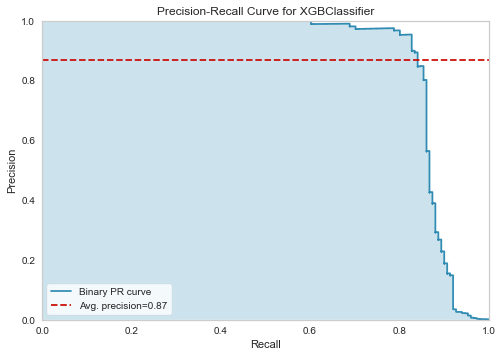

In [33]:
# Plotting Precision Recall Curve
plot_model(tuned_xgb, plot='pr')

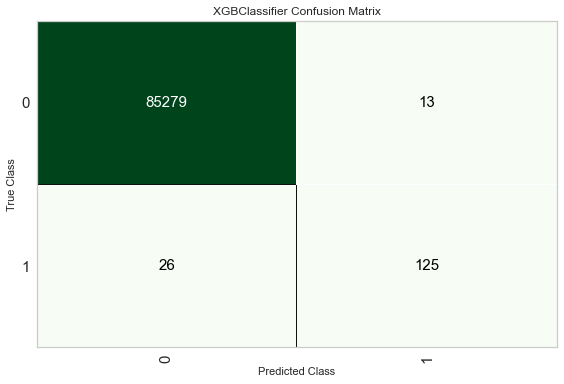

In [34]:
# Confusion matrix on the test data
plot_model(tuned_xgb, plot= 'confusion_matrix')

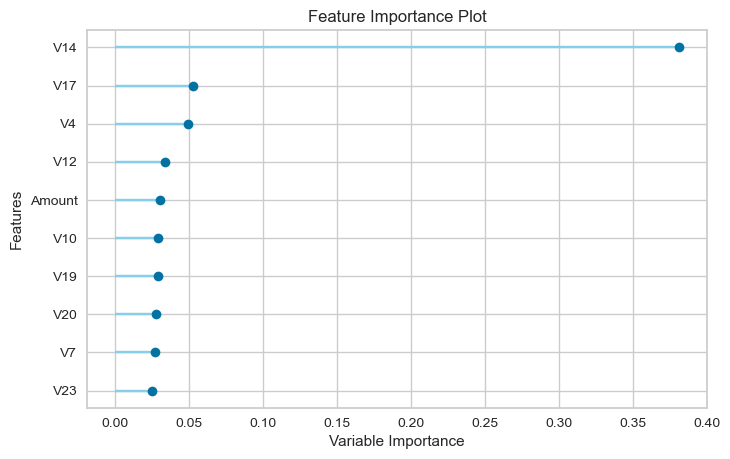

In [35]:
# Feature importance 
plot_model(tuned_xgb, plot= 'feature')